In [1]:
import pandas
pandas.__version__

'0.23.4'

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import wasserstein_distance

%matplotlib inline

### Wasserstein Distance Demo

In [117]:
source_sample = np.array([1, 2, 3])
target_sample = np.array([5, 6, 7])

In [95]:
def plot_block(sample):
    labels, counts = np.unique(sample, return_counts=True)
    n = len(sample)
    plt.bar(labels, counts / n, align='center');

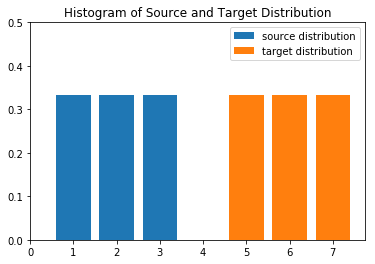

In [96]:
plot_block(source_sample)
plot_block(target_sample)
plt.ylim([0, 0.5])
plt.xticks(np.arange(0, 8, step = 1))
plt.legend(['source distribution', 'target distribution'])
plt.title('Histogram of Source and Target Distribution');

In [97]:
wd = wasserstein_distance(source_sample, target_sample)
print('Wasserstein Distance = {}'.format(wd))

Wasserstein Distance = 4.0


### KL Divergence Demo

In [146]:
def KL(P,Q):
    """
    source: 
    https://datascience.stackexchange.com/questions/9262/calculating-kl-divergence-in-python
    
    input:
        P -- numpy array for probabilty mass function, P[i] = density of i in distribution P
        Q -- numpy array for probabilty mass function, Q[i] = density of i in distribution Q
    """
    # avoid numerical issue
    epsilon = 0.00001
    P = P+epsilon
    Q = Q+epsilon
    divergence = np.sum(P*np.log(P/Q))
    # undefined in this case
    if divergence > 10:
        return 0
    return divergence

In [147]:
def sample_to_pmf(sample_arr, max_n = 30):
    """
    input:
        sample_arr -- array of samples 
    output:
        pmf_arr -- pmf_arr[i] = density of i in the (empirical) distribution
    """
    labels, counts = np.unique(sample_arr, return_counts=True)
    n = sum(counts)
    pmf_dict = {label: count / n for label, count in zip(labels, counts)}
    # inclusive max_label
    pmf_arr = np.array([pmf_dict.get(label, 0) for label in range(max_n)]) 
    return pmf_arr

In [160]:
source_sample = np.array([1, 2, 3])
target_sample = np.array([5, 6, 7])
source_dist = sample_to_pmf(source_sample)
target_dist = sample_to_pmf(target_sample)

In [161]:
kl = KL(source_dist, target_dist)
print('KL Divergence = {}'.format(kl))

KL Divergence = 0


### Wasserstein Distance wrt Source Distribution's Mean

In [181]:
def get_discrete_uniform_sample(mean):
    return [mean - 1, mean, mean + 1]

In [182]:
wd_ls = []
mean_ls = [mean for mean in range(2, 30)]
for mean in mean_ls:
    source_sample = get_discrete_uniform_sample(mean)
    wd = wasserstein_distance(source_sample, target_sample)
    wd_ls.append(wd)

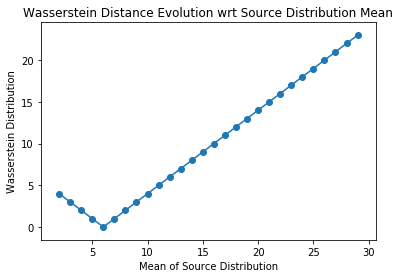

In [183]:
plt.plot(mean_ls, wd_ls)
plt.scatter(mean_ls, wd_ls)
plt.xlabel('Mean of Source Distribution')
plt.ylabel('Wasserstein Distribution')
plt.title('Wasserstein Distance Evolution wrt Source Distribution Mean');

### KL Divergence wrt Source Distribution's Mean

In [170]:
kl_ls = []
mean_ls = [mean for mean in range(2, 29)]
for mean in mean_ls:
    source_sample = get_discrete_uniform_sample(mean)
    source_dist = sample_to_pmf(source_sample)
    kl = KL(source_dist, target_dist)
    kl_ls.append(kl)

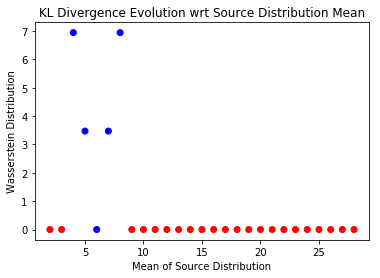

In [179]:
c_ls = ['r' if kl == 0 else 'b' for kl in kl_ls ]
c_ls [4] = 'b'
plt.scatter(mean_ls, kl_ls, c = c_ls)
plt.xlabel('Mean of Source Distribution')
plt.ylabel('Wasserstein Distribution')
plt.title('KL Divergence Evolution wrt Source Distribution Mean');